#### Importación de bibliotecas

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Carga de base de datos
Anuncios de inmuebles de alquiler turístico en las principales plataformas.

In [3]:
# Definir la paleta institucional (colocarla en una celda anterior si es necesario)
paleta = [
    "#1B3C59", "#3A5A40", "#8BAAAD", "#D9D9D9", 
    "#E8F1F2", "#A67C52", "#F4A261", "#264653", 
    "#A8DADC", "#457B9D", "#E63946", "#F4E285", 
    "#2A9D8F", "#6D597A", "#B5838D"
]


#### Conexión a MySQL

In [4]:
"""Conecta a MySQL, obtiene todas las tablas y las guarda como DataFrames en un diccionario."""

def get_database(host, user, password, database):
    try:
        cnx = mysql.connector.connect(
            host = host,
            user = user,
            password = password,
            database = database
        )

        if cnx.is_connected():
            print(f'Se conectó a la base de datos "{database}" en MySQL')

        cursor = cnx.cursor()
        cursor.execute('SHOW TABLES;')
        
        tables = cursor.fetchall()
        table_names = [table[0] for table in tables]

        print(f'Tablas encontradas: {table_names}.')

        db = {}

        for table in table_names:
            query = f'SELECT * FROM {table};'
            db[table] = pd.read_sql(query, con = cnx) 
        return db

    except mysql.connector.Error as error:
        print(f'Error: {error}')
        return None

    finally:
        if cnx.is_connected():
            cnx.close()
            print('Conexión a MySQL cerrada.')


def rename_dfs():
    for table, df in db.items():
        globals()[table] = df
        print(f'Se creó el dataframe "{table}"')

if __name__ == '__main__':
    host = '212.227.90.6'
    user = 'EquipoE'
    password = 'E1q2u3i4p5oE'
    database = 'Equip_E'

    db = get_database(host, user, password, database)
    rename_dfs()


Se conectó a la base de datos "Equip_E" en MySQL
Tablas encontradas: ['Tourist_Accommodation', 'Tourist_Accommodation10032025', 'Tourist_Accommodation17032025'].


C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\1189579851.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db[table] = pd.read_sql(query, con = cnx)


Conexión a MySQL cerrada.
Se creó el dataframe "Tourist_Accommodation"
Se creó el dataframe "Tourist_Accommodation10032025"
Se creó el dataframe "Tourist_Accommodation17032025"


## Exploración inicial

In [5]:
# se carga como df la TABLA MÁS RECIENTE
df = Tourist_Accommodation17032025
pd.set_option('display.max_columns', None) # ver todas las columnas
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2,1,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,VERDADERO,7,20,40,130,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,VERDADERO,0,0,0,162,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,VERDADERO,26,31,31,270,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,29/07/2019
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,VERDADERO,9,23,49,300,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,10/01/2020
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1,2,5.0,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,VERDADERO,0,19,49,312,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,19/02/2019


### Tamaño

In [6]:
df.shape

(18000, 35)

### Tipos de datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 18000 non-null  int64  
 1   name                         17996 non-null  object 
 2   description                  17743 non-null  object 
 3   host_id                      18000 non-null  int64  
 4   neighbourhood_name           18000 non-null  object 
 5   neighbourhood_district       10941 non-null  object 
 6   room_type                    18000 non-null  object 
 7   accommodates                 18000 non-null  int64  
 8   bathrooms                    17866 non-null  object 
 9   bedrooms                     17872 non-null  object 
 10  beds                         17929 non-null  float64
 11  amenities_list               17968 non-null  object 
 12  price                        17552 non-null  float64
 13  minimum_nights  

#### Corrección de tipos de datos

In [8]:
# conversión a numérico
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')

# conversión a booleano
df['has_availability'] = df['has_availability'].replace({'VERDADERO': True}).fillna(False)
df['has_availability'] = df['has_availability'].astype(bool)

df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
df['is_instant_bookable'] = df['is_instant_bookable'].astype(bool)

# conversión a fechas
df["first_review_date"] = pd.to_datetime(df["first_review_date"], errors="coerce")
df["last_review_date"] = pd.to_datetime(df["last_review_date"], errors="coerce")
df["insert_date"] = pd.to_datetime(df["insert_date"], errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 18000 non-null  int64         
 1   name                         17996 non-null  object        
 2   description                  17743 non-null  object        
 3   host_id                      18000 non-null  int64         
 4   neighbourhood_name           18000 non-null  object        
 5   neighbourhood_district       10941 non-null  object        
 6   room_type                    18000 non-null  object        
 7   accommodates                 18000 non-null  int64         
 8   bathrooms                    17866 non-null  float64       
 9   bedrooms                     17872 non-null  float64       
 10  beds                         17929 non-null  float64       
 11  amenities_list               17968 non-nu

C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\3580156214.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_availability'] = df['has_availability'].replace({'VERDADERO': True}).fillna(False)
C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\3580156214.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\3580156214.py:15: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (

### Duplicados

In [9]:
df.duplicated().sum()


8000

In [10]:
registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 18000
Total de duplicados exactos: 8000
El número de apartment_id duplicados es: 8350


### Análisis estadísticos y outliers


 Distribución Variables Numéricas:

                               Media  Desviación estándar  Mínimo  Q1 (25%)  Mediana  Q3 (75%)   Máximo
accommodates                    4.28                 2.58     1.0       2.0      4.0      6.00     29.0
bathrooms                       1.60                 1.00     0.0       1.0      1.0      2.00     13.0
bedrooms                        1.94                 1.33     0.0       1.0      2.0      3.00     50.0
beds                            2.93                 2.27     0.0       1.0      2.0      4.00     30.0
price                        1025.74              1009.88    60.0     450.0    750.0   1240.00  28571.0
minimum_nights                  4.96                19.36     1.0       1.0      2.0      4.00   1125.0
maximum_nights                758.94               498.58     1.0      61.0   1125.0   1125.00   1125.0
availability_30                12.93                11.81     0.0       0.0     11.0     26.00     30.0
availability_60            

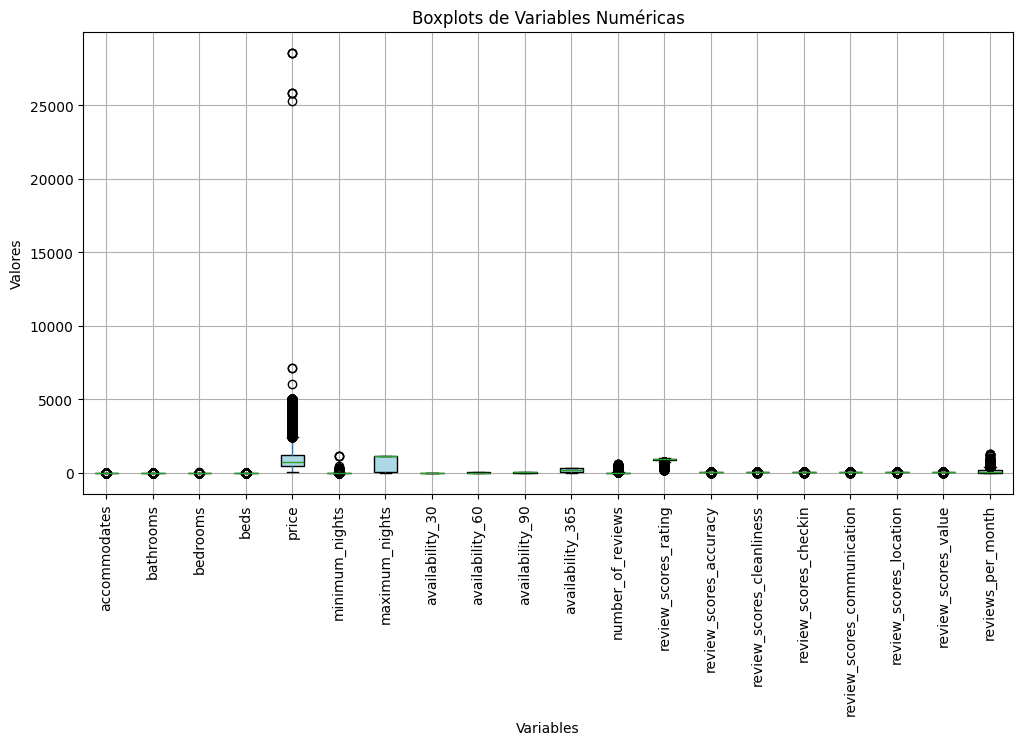

In [11]:
# Filtrar solo variables numéricas
df_numericas = df.select_dtypes(include=[np.number]).drop(columns=['apartment_id', 'host_id'],errors = 'ignore')

# Calcular estadísticas básicas
estadisticas = df_numericas.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estadisticas.columns = ['Media', 'Desviación estándar', 'Mínimo', 'Q1 (25%)', 'Mediana', 'Q3 (75%)', 'Máximo']

# Redondear a dos decimales
estadisticas = estadisticas.round(2)

# Mostrar estadísticas
print("\n Distribución Variables Numéricas:\n")
print(estadisticas.to_string())

# Crear boxplots de todas las variables numéricas
plt.figure(figsize=(12, 6))
df_numericas.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplots de Variables Numéricas")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

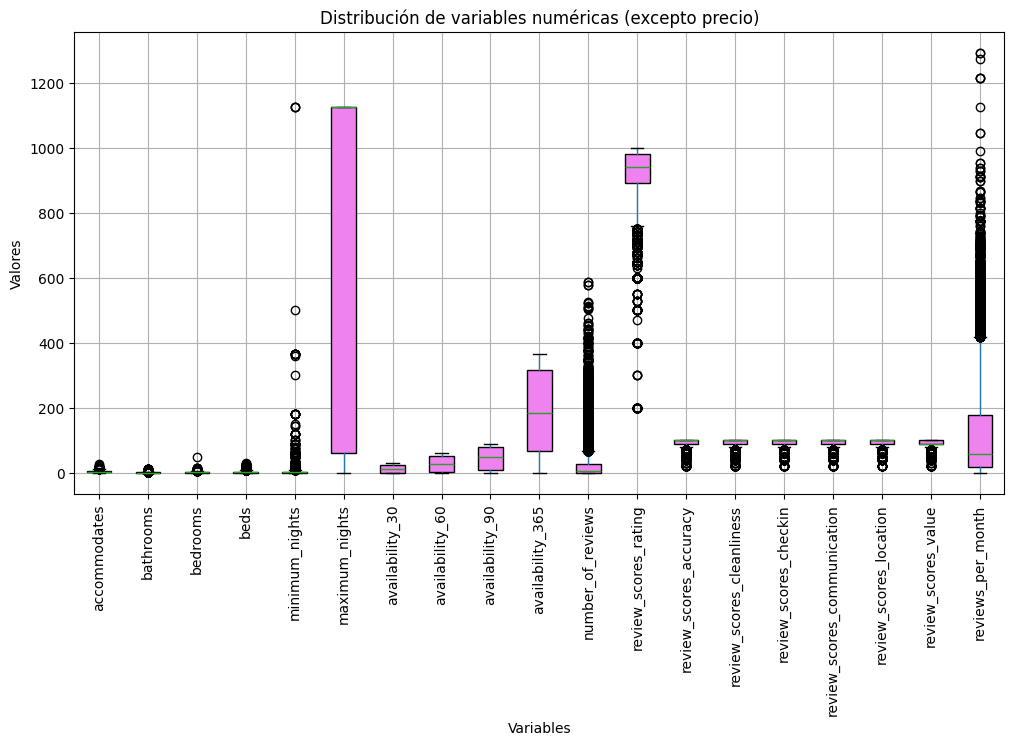

In [12]:
# nuevo gráfico sin precio para visualizar mejor las demás variables

df_no_price = df_numericas.drop('price', axis=1)
plt.figure(figsize=(12, 6))
df_no_price.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="violet"))
plt.title("Distribución de variables numéricas (excepto precio)")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

## Limpieza de datos (Data Cleaning)

### Tratamiento de duplicados

In [13]:
registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 18000
Total de duplicados exactos: 8000
El número de apartment_id duplicados es: 8350


In [14]:
# Filtar las filas con apartment_id duplicados
duplicados_filas = df[df['apartment_id'].duplicated(keep=False)]

# Mostrar las filas duplicadas
duplicados_filas.head(10)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2.0,1.0,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,True,7,20,40,130,78,2010-02-01,2017-05-09,970.0,100.0,100.0,100.0,100.0,100.0,100.0,False,75.0,spain,malaga,2018-07-31
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.0,1.0,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,True,0,0,0,162,33,2014-10-10,NaT,920.0,90.0,90.0,100.0,100.0,80.0,90.0,False,52.0,spain,madrid,2020-01-10
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,True,26,31,31,270,148,2011-05-01,NaT,980.0,100.0,100.0,100.0,100.0,100.0,100.0,True,142.0,spain,sevilla,2019-07-29
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.0,1.0,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,True,9,23,49,300,292,NaT,2020-04-01,940.0,100.0,90.0,100.0,100.0,100.0,90.0,True,306.0,spain,barcelona,2020-01-10
9,73683,Sagrada Familia area for 12 people,"An ideal location for a big group, two apartme...",135703,el Camp d'en Grassot i Gr�cia Nova,Gr�cia,Entire home/apt,12,2.0,4.0,14.0,"TV,Cable TV,Internet,Wifi,Air conditioning,Kit...",3000.0,2,60,True,8,12,23,296,120,2011-04-06,NaT,920.0,90.0,90.0,100.0,100.0,90.0,90.0,True,14.0,spain,barcelona,2018-06-09
11,79755,3Br-2bath-AC Full 5 stars reviews!,"90 m2 apartment, 2 baths, 3 bedrooms. Fully eq...",429939,l'Antiga Esquerra de l'Eixample,Eixample,Entire home/apt,5,2.0,3.0,4.0,"TV,Internet,Wireless Internet,Air conditioning...",1100.0,3,365,True,9,10,10,10,189,NaT,2016-01-10,980.0,100.0,100.0,100.0,100.0,100.0,100.0,True,234.0,spain,barcelona,2017-12-09
13,89776,Modernist flat Downtown Casa Estap� | Barcelona,"Unique and rare ! Stay in the Casa Estap�, jew...",488151,el Fort Pienc,Eixample,Entire home/apt,4,1.0,1.0,2.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Elev...",650.0,3,365,True,7,18,41,224,322,2011-10-11,2019-01-12,960.0,100.0,100.0,100.0,100.0,100.0,100.0,True,327.0,spain,barcelona,2019-12-10
14,89954,Amazing apt in the historic center,"Beautiful, new, central and cosy apartment per...",487095,Palacio,Centro,Entire home/apt,6,1.0,2.0,3.0,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Elev...",1030.0,2,20,True,27,48,49,61,181,2011-01-07,2018-01-11,970.0,100.0,100.0,100.0,100.0,100.0,100.0,False,202.0,spain,madrid,2018-11-07
17,103386,"Central 2 Bedrooms, 3/5 pers. Wi-Fi","This is Edificio Palomar Apartments, I will tr...",508042,EL PILAR,CIUTAT VELLA,Entire home/apt,5,1.0,2.0,3.0,"TV,Wifi,Air conditioning,Kitchen,Paid parking ...",840.0,1,14,True,17,38,64,229,13,2011-01-11,NaT,930.0,100.0,100.0,100.0,90.0,90.0,100.0,False,13.0,spain,valencia,2019-10-31
18,107437,A beautiful villa in Barcelona,"A conserved, period villa situated in the mids...",556626,"Vallvidrera, el Tibidabo i les Planes",Sarri�-Sant Gervasi,Entire home/apt,8,2.0,5.0,6.0,"TV,Wifi,Kitchen,Free parking on premises,Smoki...",2200.0,3,120,True,12,41,59,250,34,2011-08-07,NaT,930.0,100.0,100.0,100.0,100.0,100.0,90.0,True,38.0,spain,barcelona,2018-10-10


Se decidió borrar solo los duplicados exactos y mantener los parciales (que son duplicados de la columna apartment_id) para que cada perfil decida cómo los tratará en su análisis.

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(10000, 35)

### Valores nulos

In [17]:
df.isnull().sum()

apartment_id                      0
name                              3
description                     138
host_id                           0
neighbourhood_name                0
neighbourhood_district         3921
room_type                         0
accommodates                      0
bathrooms                        74
bedrooms                         70
beds                             45
amenities_list                   17
price                           254
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              6897
last_review_date               6944
review_scores_rating           2709
review_scores_accuracy         2718
review_scores_cleanliness      2712
review_scores_checkin          2723
review_scores_communication 

#### Eliminación de columnas irrelevantes

In [18]:
df = df.drop(columns=['description', 'country'])

#### Función de imputación de nulos

In [19]:
def imputación_desde_duplicados(df, id_col, date_col):
    """
    Conserva el duplicado más antiguo y completa sus valores faltantes 
    con los del más reciente SIN eliminar registros.
    Devuelve el df con valores actualizados y un resumen de los cambios.
    """

    df = df.copy()  # no modifica el df original
    resumen = []

    # filtra solo duplicadas por id_col
    grupos_duplicados = df[df.duplicated(subset=[id_col], keep=False)]

    for value, group in grupos_duplicados.groupby(id_col):
        if len(group) > 1:
            # ordena (más antiguo primero)
            group = group.sort_values(by=date_col, ascending=True)
            earliest_index = group.index[0]
            latest_index = group.index[1]

            # completa valores faltantes en el registro antiguo
            actualizacion = {}
            for col in df.columns:
                if pd.isna(df.at[earliest_index, col]) and not pd.isna(df.at[latest_index, col]):
                    df.at[earliest_index, col] = df.at[latest_index, col]
                    actualizacion[col] = df.at[latest_index, col]

            # si hubo cambios, se guarda en el resumen
            if actualizacion:
                resumen.append({
                    "ID": value,
                    "índice del registro antiguo": earliest_index,
                    "índice del registro reciente": latest_index,
                    "columnas actualizadas": actualizacion
                })

    # convierte el resumen en df
    resumen_df = pd.DataFrame(resumen)

    return df, resumen_df

df, resumen_cambios = imputación_desde_duplicados(df, id_col='apartment_id', date_col='insert_date')

#### Neighbourhood_district

In [20]:
# Imputación de valores nulos en 'neighbourhood_district' utilizando la moda de 'neighbourhood_name' filtrando por 'city'.

df['neighbourhood_district'] = df.groupby(['city', 'neighbourhood_name'])['neighbourhood_district'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Desconocido")
)

#### Características numéricas del alojamiento
Se sustituyen los nulos por 1, bajo el entendido de que en todos los alojamientos por defecto hay 1 cama, 1 baño y aloja a al menos a 1 persona.

In [21]:
df[['beds', 'bathrooms', 'bedrooms']] = df[['accommodates', 'bathrooms', 'bedrooms']].fillna(1)

#### Precio

In [22]:
# Reemplazar los nulos en 'price' con la mediana del 'price' según 'room_type'
df['price'] = df.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))

#### Columnas de texto

In [23]:
df["name"].fillna("Desconocido", inplace=True)
df['amenities_list'] = df['amenities_list'].fillna("Sin información")

C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\1815731930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["name"].fillna("Desconocido", inplace=True)


#### Verificación

In [24]:
df.isnull().sum()

apartment_id                      0
name                              0
host_id                           0
neighbourhood_name                0
neighbourhood_district            0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities_list                    0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              6883
last_review_date               6901
review_scores_rating           2685
review_scores_accuracy         2694
review_scores_cleanliness      2688
review_scores_checkin          2699
review_scores_communication    2690
review_scores_location      

El df resultante tiene únicamente nulos en las variables relativas a las reseñas, lo cual es esperable, ya que no todos los avisos tendrán reseñas.

## Transformación de Datos (Data Transformation)

In [25]:
# Definir las columnas numéricas sobre las que calcular la media
# columnas_media = ["availability_30", "availability_60", "availability_90", "availability_365"]

# # Agrupar por 'apartment_id' y calcular la media de las columnas seleccionadas
# df_agrupado = df.groupby("apartment_id", as_index=False)[columnas_media].mean()

# # Mostrar el resultado
# # Si usas Jupyter Notebook, puedes usar display() para mejor visualización
# from IPython.display import display
# display(df_agrupado)

In [26]:
# print(df_agrupado[df_agrupado['apartment_id'] == 343864])

In [27]:
# df_agrupado.duplicated().sum()

## Reducción de Datos (Data Reduction)

## Fin de la limpieza - Dataset limpio

# EDA Inventario - Inicio

## **Rol**: Operaciones y gestión de inventario

## **Objetivo de negocio:** Supervisar la disponibilidad, ocupacción y operaciones eficientes de los alojamientos

## **Pregunta de Negocio**: ¿Como afecta el número de habitaciones, baños y camas disponibles en la disponibilidad media de los alojamientos? Difiere entre ciudades?

## Limpieza y N

In [28]:
df.duplicated().sum()

registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 10000
Total de duplicados exactos: 0
El número de apartment_id duplicados es: 350


Decidimos trabajar con N = 10.000 debido a que cuantos mas datos (observaciones) tengamos mejor para responder la pregunta de negocio. No observamos una incompatibilidad al dejar mas de una observación de la misma propiedad. 

## Exploración Variables de Pregunta de Negocio

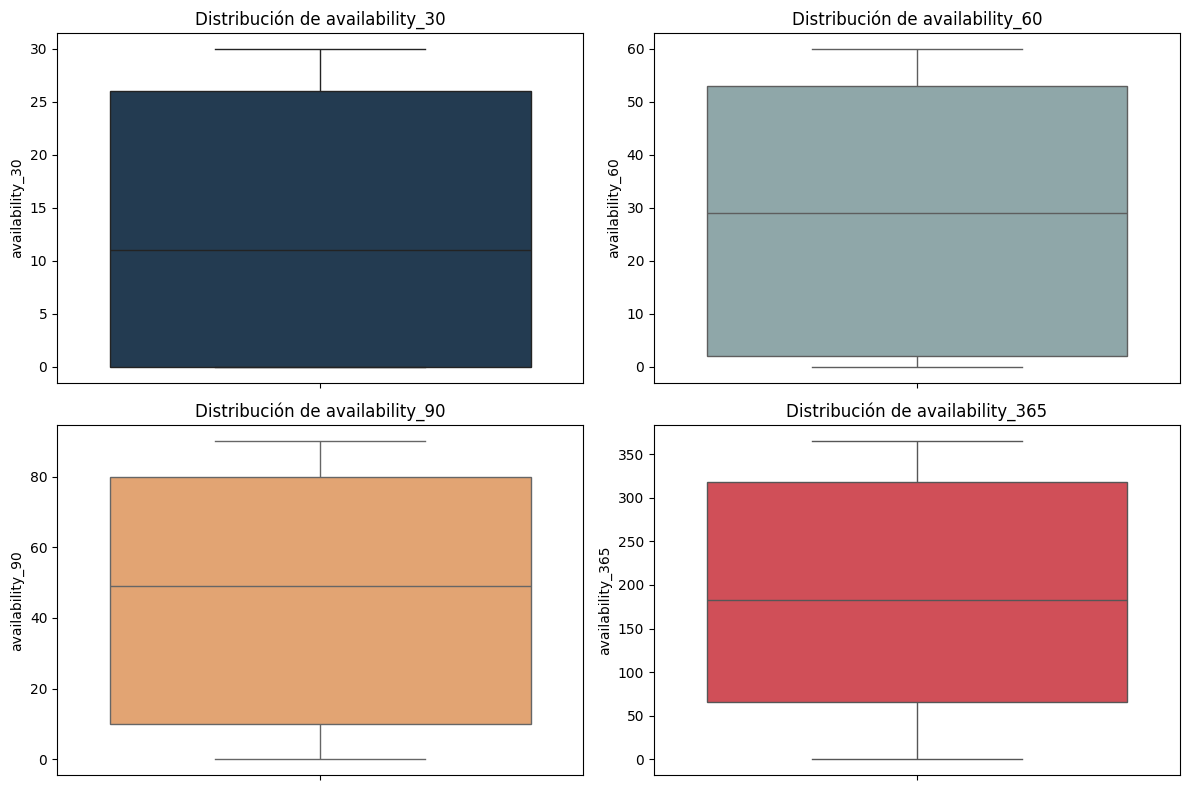

In [29]:
# Seleccionar 4 colores distintos para los boxplots
colores_seleccionados = [paleta[0], paleta[2], paleta[6], paleta[10]]  # Azul profundo, Azul grisáceo, Naranja suave, Rojo coral

availability_cols = ["availability_30", "availability_60", "availability_90", "availability_365"]

# Crear la figura con subgráficos (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Recorrer las columnas y asignarlas a los subgráficos
for i, col in enumerate(availability_cols):
    row, col_idx = divmod(i, 2)  # Calcular posición en la cuadrícula
    sns.boxplot(y=df[col], ax=axes[row, col_idx], color=colores_seleccionados[i])  # Aplicar color de la paleta  # Crear boxplot
    axes[row, col_idx].set_title(f'Distribución de {col}')  # Agregar título

# Ajustar diseño para evitar superposición
plt.tight_layout()
plt.show()

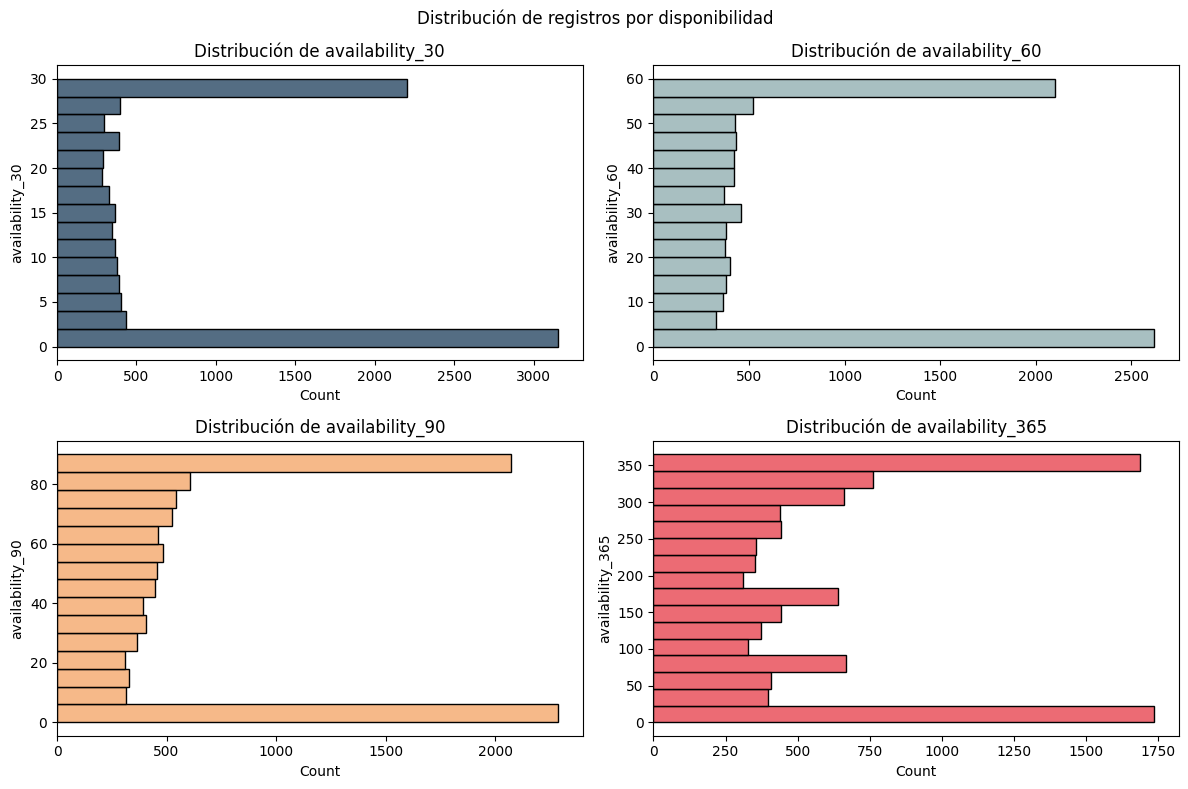

In [30]:
# Seleccionar 4 colores distintos para los boxplots
colores_seleccionados = [paleta[0], paleta[2], paleta[6], paleta[10]]  # Azul profundo, Azul grisáceo, Naranja suave, Rojo coral

# Crear la figura con subgráficos (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Recorrer las columnas y asignarlas a los subgráficos
for i, col in enumerate(availability_cols):
    row, col_idx = divmod(i, 2)  # Calcular posición en la cuadrícula
    sns.histplot(y=df[col], ax=axes[row, col_idx], color=colores_seleccionados[i])  # Aplicar color de la palet  # Crear boxplot
    axes[row, col_idx].set_title(f'Distribución de {col}')  # Agregar título

fig.suptitle("Distribución de registros por disponibilidad")

# Ajustar diseño para evitar superposición
plt.tight_layout()

plt.show()

C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\1265519230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette=paleta[:len(city_counts)])


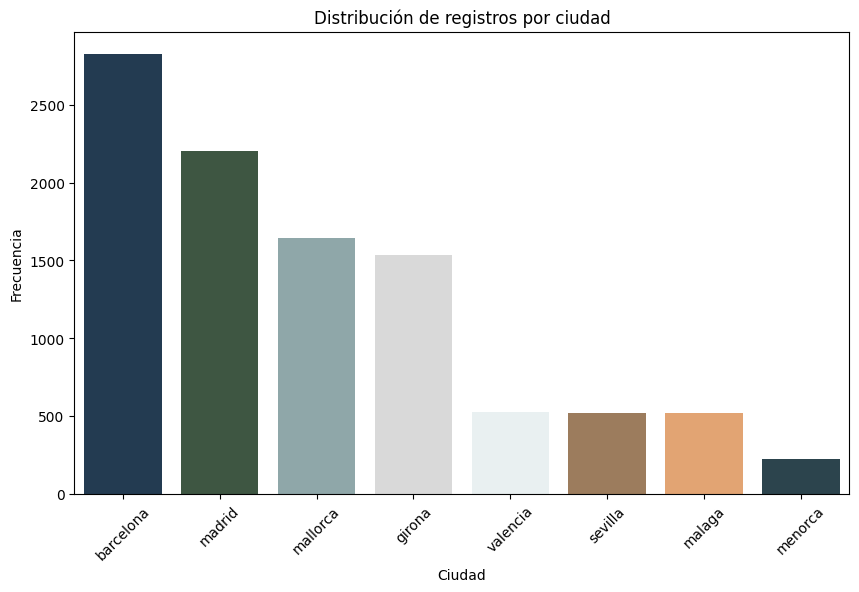

In [31]:
# Contar la frecuencia de cada ciudad
city_counts = df["city"].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette=paleta[:len(city_counts)]) 

# Personalizar el gráfico
plt.xlabel("Ciudad")
plt.ylabel("Frecuencia")
plt.title("Distribución de registros por ciudad")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

# Mostrar el gráfico
plt.show()

bathrooms
bedrooms
beds   

# Variables y sus valores

In [32]:
print(df['bathrooms'].unique())
print(df['bedrooms'].unique())
print(df['beds'].unique())

[ 2.  1.  4.  0.  5.  3.  7.  6.  9.  8. 10. 12. 11. 13.]
[ 1.  2.  4.  3.  5.  0.  6.  8.  9. 14.  7. 10. 12. 16. 50.]
[ 2  1  4  5  8  6  3 12  9 16  7 11 10 13 15 14 29 18 20 24 19]


## explorando valores atípicos (número alto de habitaciones)

In [33]:
df.sort_values('bedrooms', ascending=False,).head(50)

,apartment_id,name,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,city,insert_date
8456,34523812,NEW RESIDENCE IN MADRID 50 INDIVIDUALS ROOMS,130100816,Pradolongo,Usera,Entire home/apt,1,12.0,50.0,1,"TV,Wifi,Kitchen,Elevator,Heating,Washer,Smoke ...",250.0,1,1125,True,30,60,90,365,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,madrid,2019-06-07
4588,19412149,"Mallaui, a whole palace by the sea",136087677,Ciutadella de Menorca,Desconocido,Entire home/apt,16,7.0,16.0,16,"TV,Wifi,Kitchen,Free parking on premises,Smoki...",950.0,4,30,True,9,10,10,85,4,2018-10-08,2019-09-07,1000.0,100.0,100.0,100.0,100.0,100.0,100.0,True,18.0,menorca,2020-05-31
3247,15883302,Ca's Misser,102986764,Algaida,Desconocido,Entire home/apt,29,8.0,14.0,29,"TV,Cable TV,Internet,Wifi,Air conditioning,Poo...",950.0,1,1125,True,5,19,27,218,3,NaT,NaT,800.0,80.0,90.0,90.0,60.0,90.0,70.0,True,32.0,mallorca,2020-02-29
1161,5429715,Cal Pubill de Ciuret 35pax,20320423,Vidr�,Desconocido,Entire home/apt,16,9.0,14.0,16,"TV, Indoor fireplace, Pool, Iron, Crib, Hair d...",950.0,2,1125,True,24,54,77,296,1,2019-08-12,2019-08-12,1000.0,100.0,100.0,100.0,100.0,100.0,100.0,True,9.0,girona,2020-10-28
7675,30917851,CAN GRAU (CAN GRAU 24) - Villa for 24 people i...,80839530,Sencelles,Desconocido,Entire home/apt,24,12.0,12.0,24,"TV,Cable TV,Internet,Wifi,Air conditioning,Poo...",950.0,7,1125,True,0,0,0,164,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,mallorca,2019-04-24
4933,20397361,"Idyllische Finca mit Pool, Garten, Tiere, WLAN",57603545,Sant Lloren� des Cardassar,Desconocido,Entire home/apt,16,11.0,12.0,16,"TV,Cable TV,Wifi,Pool,Kitchen,Free parking on ...",1700.0,6,1125,True,10,34,43,160,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,mallorca,2020-06-25
2586,13576820,Villa Pima. Costa Brava (for 24 people).,51811531,Vidreres,Desconocido,Entire home/apt,16,8.0,12.0,16,"TV,Cable TV,Wifi,Pool,Kitchen,Smoking allowed,...",5000.0,7,14,True,20,20,20,113,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,girona,2019-08-31
9435,40550295,Idyllischer Fincaurlaub f�r Biker inkl. Fr�hst�ck,11125218,Sencelles,Desconocido,Private room,16,13.0,12.0,16,"First aid kit, Indoor fireplace, Wifi, Free pa...",1710.0,3,1125,True,29,59,89,364,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,mallorca,2020-10-21
6234,24228419,Lobos - Llucmajor,96145168,Llucmajor,Desconocido,Entire home/apt,20,8.0,10.0,20,"TV,Cable TV,Internet,Wifi,Pool,Kitchen,Free pa...",950.0,1,1125,True,0,0,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,mallorca,2019-09-28
1394,6695341,charming 200 year old �finca�,3774266,Consell,Desconocido,Entire home/apt,16,7.0,10.0,16,"TV,Internet,Wireless Internet,Air conditioning...",950.0,5,1125,False,0,0,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,mallorca,2017-03-15


### cambio de tipo de dato a integer

In [34]:
df['bathrooms'] = df['bathrooms'].astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)

## distribución variables (histogramas)

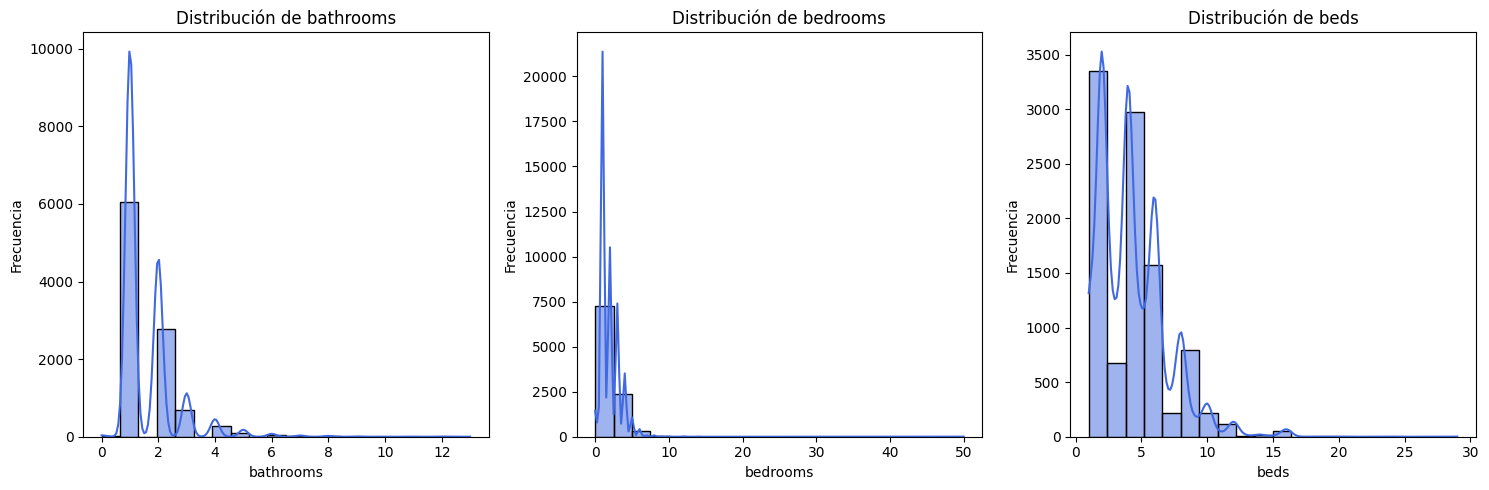

In [35]:
# Lista de variables a analizar
variables = ['bathrooms', 'bedrooms', 'beds']

# Crear figuras para cada histograma
plt.figure(figsize=(15, 5))  # Ajusta el tamaño de la figura

for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)  # Crear subgráficos en una fila
    sns.histplot(df[var], bins=20, kde=True, color='royalblue')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


## distribución valores (boxplot)

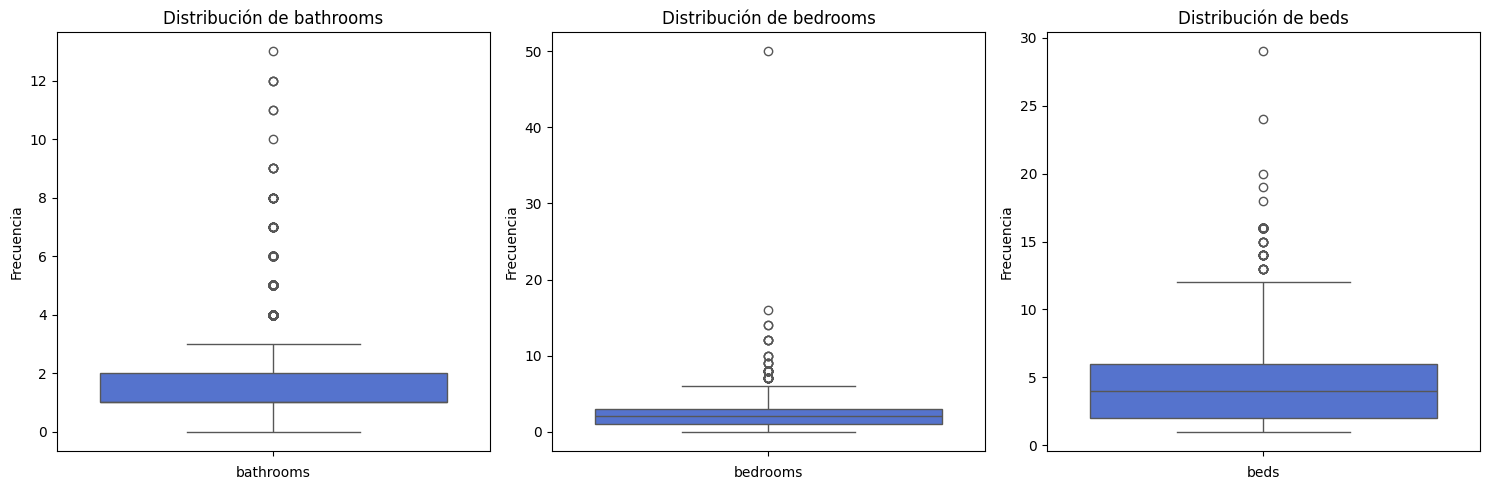

In [36]:
# Crear figuras para cada histograma
plt.figure(figsize=(15, 5))  # Ajusta el tamaño de la figura

for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)  # Crear subgráficos en una fila
    sns.boxplot(df[var], color='royalblue')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\876517190.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=feature, y="availability_mean", data=df_filtered, palette=paleta)
C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\876517190.py:16: UserWarning: The palette list has more values (15) than needed (14), which may not be intended.
  ax = sns.boxplot(x=feature, y="availability_mean", data=df_filtered, palette=paleta)


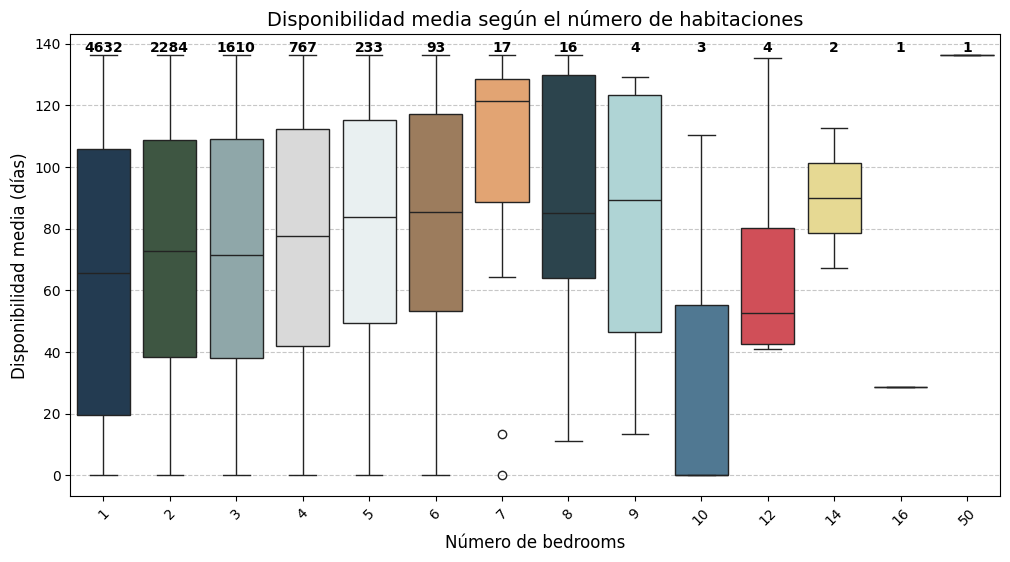

C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\876517190.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=feature, y="availability_mean", data=df_filtered, palette=paleta)
C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\876517190.py:16: UserWarning: The palette list has more values (15) than needed (13), which may not be intended.
  ax = sns.boxplot(x=feature, y="availability_mean", data=df_filtered, palette=paleta)


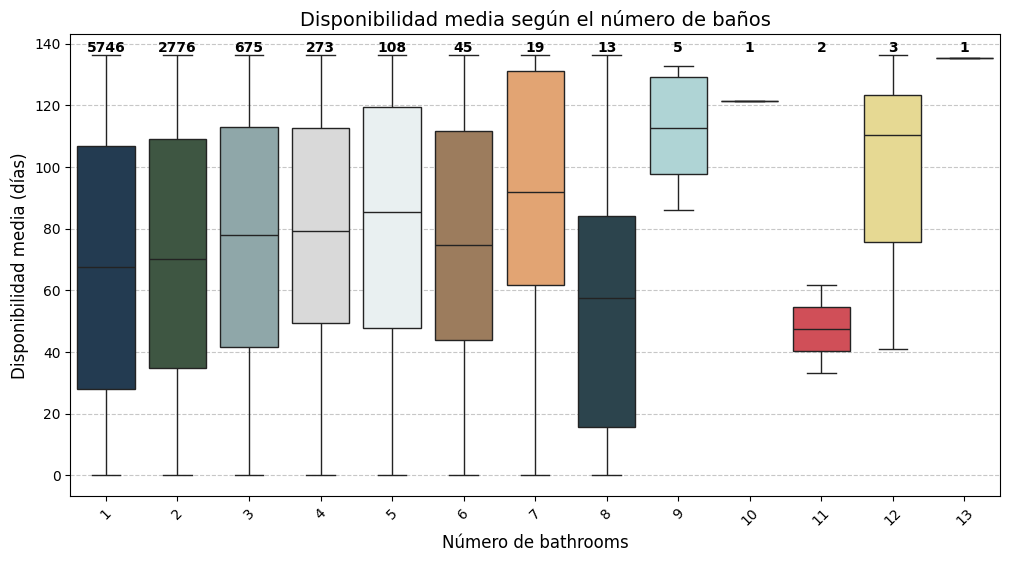

C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\876517190.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=feature, y="availability_mean", data=df_filtered, palette=paleta)
C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\876517190.py:16: UserWarning: 
The palette list has fewer values (15) than needed (21) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x=feature, y="availability_mean", data=df_filtered, palette=paleta)


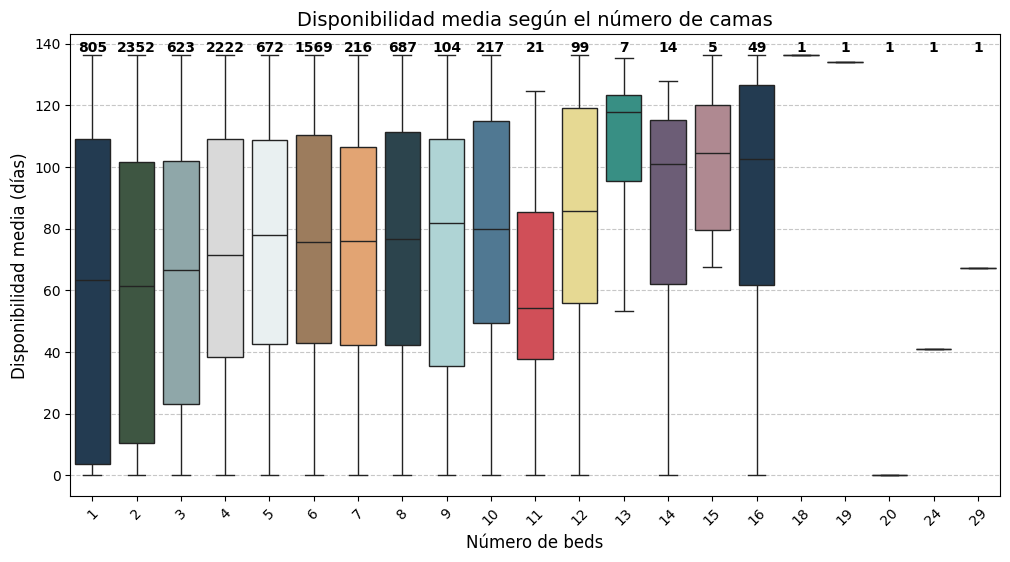

In [49]:
# Crear una columna con disponibilidad media
df["availability_mean"] = df[["availability_30", "availability_60", "availability_90", "availability_365"]].mean(axis=1)

# Filtrar valores extremos (opcional)
df_filtered = df[(df["bedrooms"] > 0) & (df["bathrooms"] > 0) & (df["beds"] > 0)]  

# Configurar paleta de colores
paleta = [
    "#1B3C59", "#3A5A40", "#8BAAAD", "#D9D9D9", "#E8F1F2", "#A67C52",
    "#F4A261", "#264653", "#A8DADC", "#457B9D", "#E63946", "#F4E285",
    "#2A9D8F", "#6D597A", "#B5838D"
]

def plot_boxplot(feature, title):
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(x=feature, y="availability_mean", data=df_filtered, palette=paleta)

    # Agregar etiquetas de conteo encima de cada boxplot
    counts = df_filtered[feature].value_counts().sort_index()
    for i, valor in enumerate(counts.index):
        count = counts[valor]
        plt.text(i, df_filtered["availability_mean"].max(), str(count), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

    plt.xlabel(f"Número de {feature}", fontsize=12)
    plt.ylabel("Disponibilidad media (días)", fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Generar gráficos para habitaciones, baños y camas
plot_boxplot("bedrooms", "Disponibilidad media según el número de habitaciones")
plot_boxplot("bathrooms", "Disponibilidad media según el número de baños")
plot_boxplot("beds", "Disponibilidad media según el número de camas")


# Análisis Outliers

Creamos una columna Outliers

C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\1590141988.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analysis, x="outlier", y="availability_30", palette=["#1B3C59", "#F4A261"])


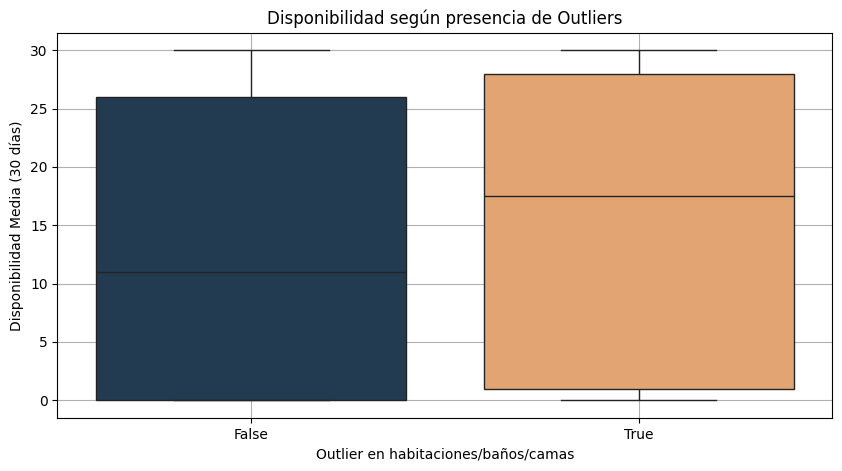

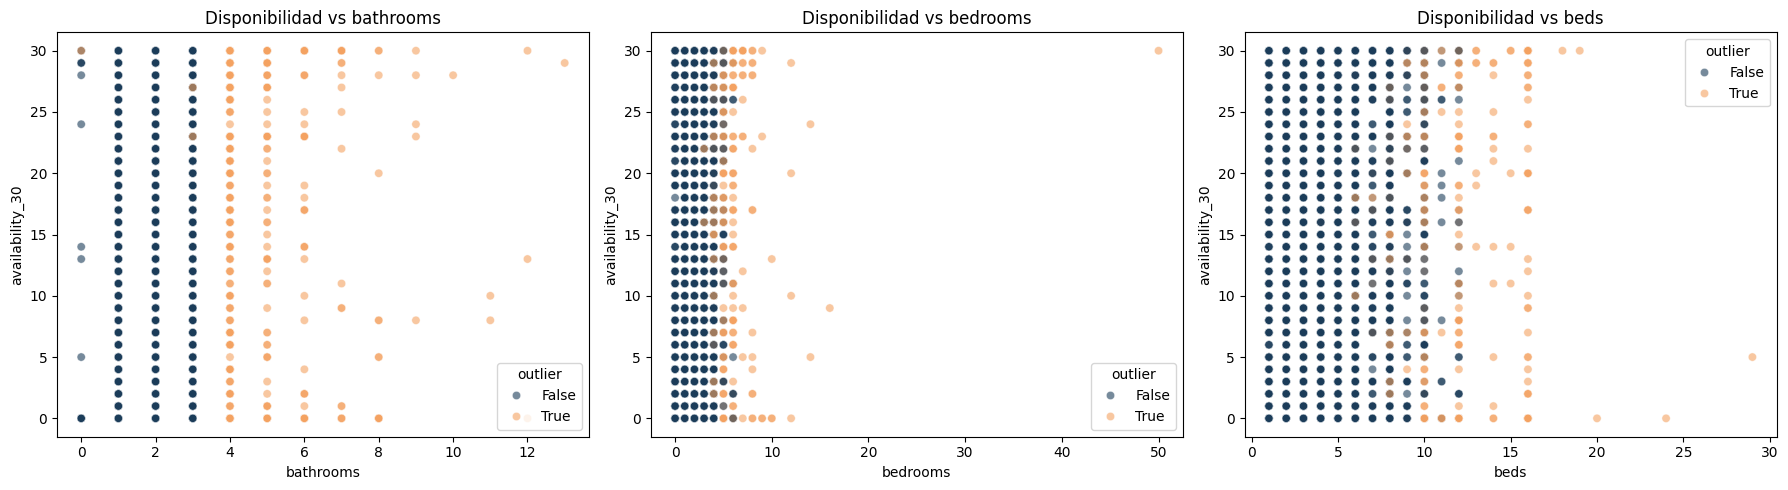

outlier        False      True 
city                           
barcelona  11.867362  16.139535
girona     14.782853  16.972727
madrid     11.630244  16.090909
malaga     12.739216  19.100000
mallorca   13.877447  14.849057
menorca    13.858586  17.038462
sevilla    14.810078  12.500000
valencia   13.419048  10.000000


In [37]:
# Definir las variables de interés
variables = ["bathrooms", "bedrooms", "beds"]
df_analysis = df[variables + ["availability_30", "city"]].copy()

# Convertir a numérico (si hay valores no numéricos como strings)
for col in variables:
    df_analysis[col] = pd.to_numeric(df_analysis[col], errors='coerce')

# Función para detectar outliers usando IQR
def detectar_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[col] < lower_bound) | (df[col] > upper_bound)

# Crear una columna que identifique si es outlier en alguna variable
df_analysis["outlier"] = False
for col in variables:
    df_analysis["outlier"] = df_analysis["outlier"] | detectar_outliers(df_analysis, col)

# Comparar disponibilidad media entre outliers y no outliers
disponibilidad_comparacion = df_analysis.groupby("outlier")["availability_30"].mean()

# Visualización: Boxplots de disponibilidad por outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_analysis, x="outlier", y="availability_30", palette=["#1B3C59", "#F4A261"])
plt.xlabel("Outlier en habitaciones/baños/camas")
plt.ylabel("Disponibilidad Media (30 días)")
plt.title("Disponibilidad según presencia de Outliers")
plt.grid(True)
plt.show()

# Visualización: Relación entre cada variable y disponibilidad
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(variables):
    sns.scatterplot(data=df_analysis, x=col, y="availability_30", hue="outlier", alpha=0.6, ax=axes[i], palette=["#1B3C59", "#F4A261"])
    axes[i].set_title(f"Disponibilidad vs {col}")
plt.tight_layout()
plt.show()

# Análisis por ciudad
df_city = df_analysis.groupby(["city", "outlier"])["availability_30"].mean().unstack()
print(df_city)


## test estadístico y correlación con disponibilidad

Estadístico de la prueba t: -5.02
Valor p: 0.00000
Conclusión: La diferencia es estadísticamente significativa.

Matriz de correlación:
                 bathrooms  bedrooms      beds  availability_30
bathrooms         1.000000  0.689420  0.621431         0.052469
bedrooms          0.689420  1.000000  0.799933         0.053666
beds              0.621431  0.799933  1.000000         0.071241
availability_30   0.052469  0.053666  0.071241         1.000000


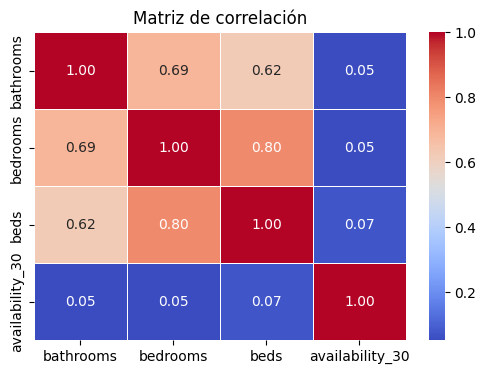

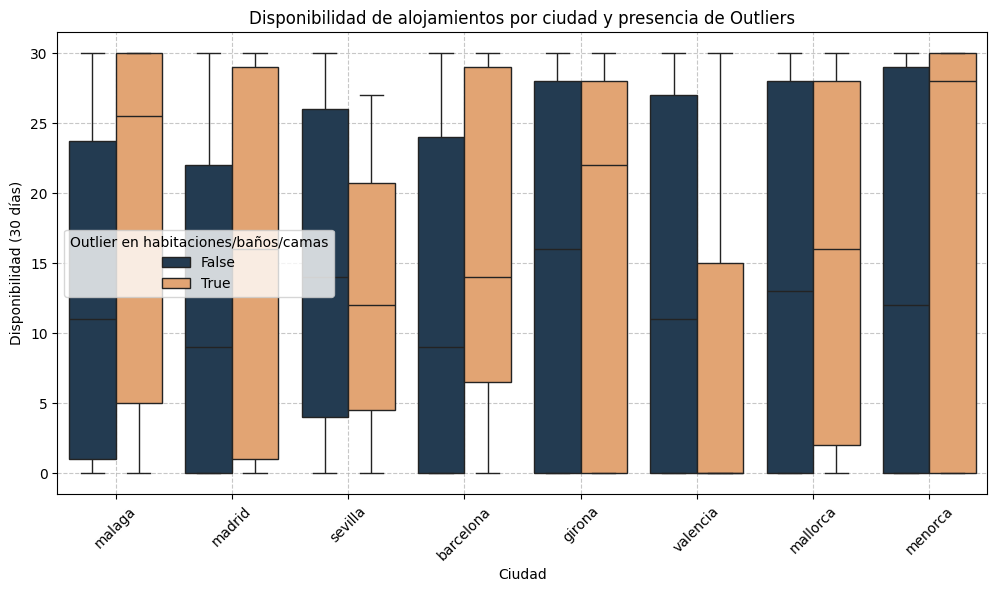

In [38]:
from scipy.stats import ttest_ind

# Separar los grupos con y sin outliers
disponibilidad_sin_outliers = df_analysis[df_analysis["outlier"] == False]["availability_30"]
disponibilidad_con_outliers = df_analysis[df_analysis["outlier"] == True]["availability_30"]

# Prueba t de Student
t_stat, p_value = ttest_ind(disponibilidad_sin_outliers, disponibilidad_con_outliers, equal_var=False)

# Mostrar resultados
print(f"Estadístico de la prueba t: {t_stat:.2f}")
print(f"Valor p: {p_value:.5f}")
if p_value < 0.05:
    print("Conclusión: La diferencia es estadísticamente significativa.")
else:
    print("Conclusión: No hay suficiente evidencia para afirmar que la diferencia es significativa.")

# 📊 Matriz de correlación
correlacion = df_analysis[["bathrooms", "bedrooms", "beds", "availability_30"]].corr()
print("\nMatriz de correlación:")
print(correlacion)

# 📈 Heatmap de correlaciones
plt.figure(figsize=(6,4))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

# 📉 Boxplot por ciudad
plt.figure(figsize=(12,6))
sns.boxplot(data=df_analysis, x="city", y="availability_30", hue="outlier", palette=["#1B3C59", "#F4A261"])
plt.xticks(rotation=45)
plt.xlabel("Ciudad")
plt.ylabel("Disponibilidad (30 días)")
plt.title("Disponibilidad de alojamientos por ciudad y presencia de Outliers")
plt.legend(title="Outlier en habitaciones/baños/camas")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


## Distribución de disponibilidad por ciudad según si son outliers o no

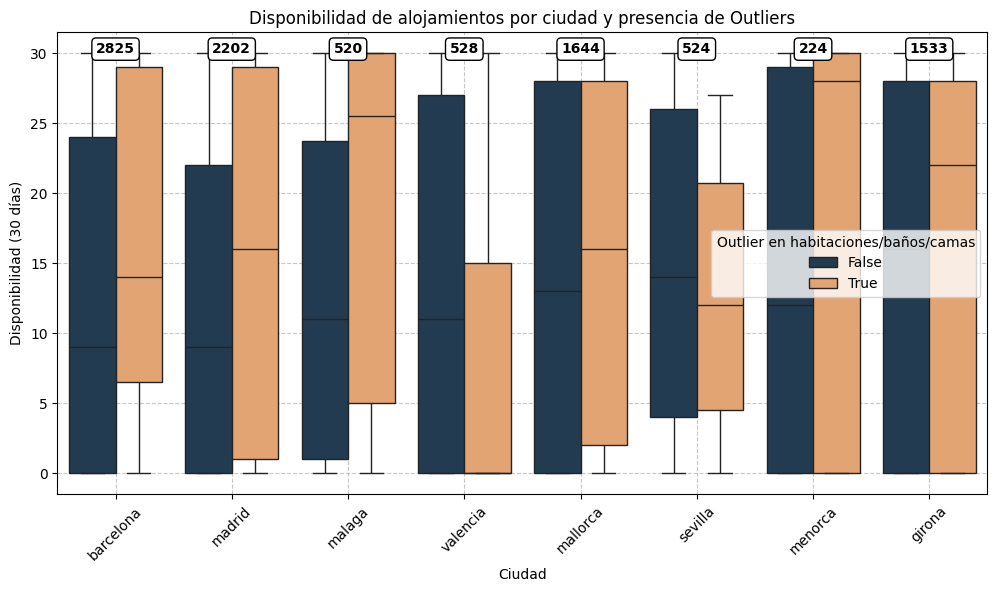

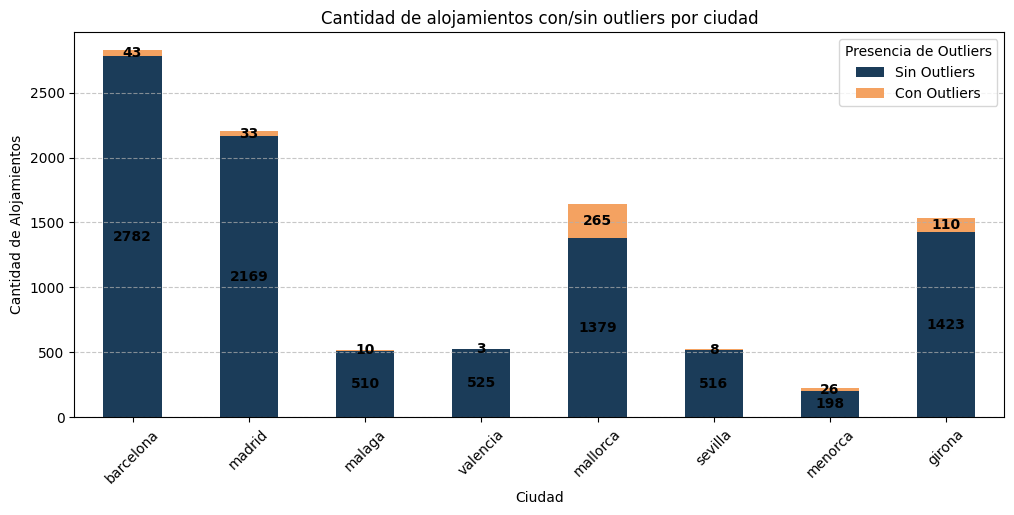

In [39]:
# Ordenamos las ciudades según la mediana de disponibilidad
city_order = df_analysis.groupby("city")["availability_30"].median().sort_values().index

# 📈 Boxplot por ciudad con outliers diferenciados
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_analysis, x="city", y="availability_30", hue="outlier",
                 palette=["#1B3C59", "#F4A261"], order=city_order)

plt.xticks(rotation=45)
plt.xlabel("Ciudad")
plt.ylabel("Disponibilidad (30 días)")
plt.title("Disponibilidad de alojamientos por ciudad y presencia de Outliers")
plt.legend(title="Outlier en habitaciones/baños/camas")
plt.grid(True, linestyle="--", alpha=0.7)

# Agregamos etiquetas de conteo sobre los boxplots (ajustadas para evitar superposición)
for i, city in enumerate(city_order):
    total_count = len(df_analysis[df_analysis["city"] == city])
    ax.text(i, df_analysis["availability_30"].quantile(0.95), str(total_count),
            horizontalalignment="center", size=10, color="black", weight="semibold",
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))

plt.show()

# 📊 Conteo de registros con/sin outliers por ciudad (ordenado igual que el boxplot)
outlier_counts = df_analysis.groupby(["city", "outlier"]).size().unstack().loc[city_order]

# Gráfico de barras mejorado
fig, ax = plt.subplots(figsize=(12, 5))
outlier_counts.plot(kind="bar", stacked=True, ax=ax, color=["#1B3C59", "#F4A261"])

plt.xlabel("Ciudad")
plt.ylabel("Cantidad de Alojamientos")
plt.title("Cantidad de alojamientos con/sin outliers por ciudad")
plt.xticks(rotation=45)

# Agregar etiquetas con los valores de cada barra
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type="center", fontsize=10, color="black", weight="bold")

plt.legend(["Sin Outliers", "Con Outliers"], title="Presencia de Outliers")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [40]:
# Filtrar solo los outliers
outliers_df = df_analysis[df_analysis["outlier"] == True][["bathrooms", "bedrooms", "beds", "city"]]

# Mostrar las primeras filas de la tabla
outliers_df.head(20)  # Puedes cambiar el número si quieres más o menos registros


,bathrooms,bedrooms,beds,city
16,4,4,16,girona
24,5,4,8,girona
25,5,4,8,girona
29,5,1,7,madrid
72,4,4,8,barcelona
87,4,4,8,mallorca
165,4,6,13,menorca
166,7,6,15,mallorca
186,4,5,10,mallorca
267,4,6,12,barcelona


C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\876517190.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=feature, y="availability_mean", data=df_filtered, palette=paleta)
C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\876517190.py:16: UserWarning: The palette list has more values (15) than needed (14), which may not be intended.
  ax = sns.boxplot(x=feature, y="availability_mean", data=df_filtered, palette=paleta)


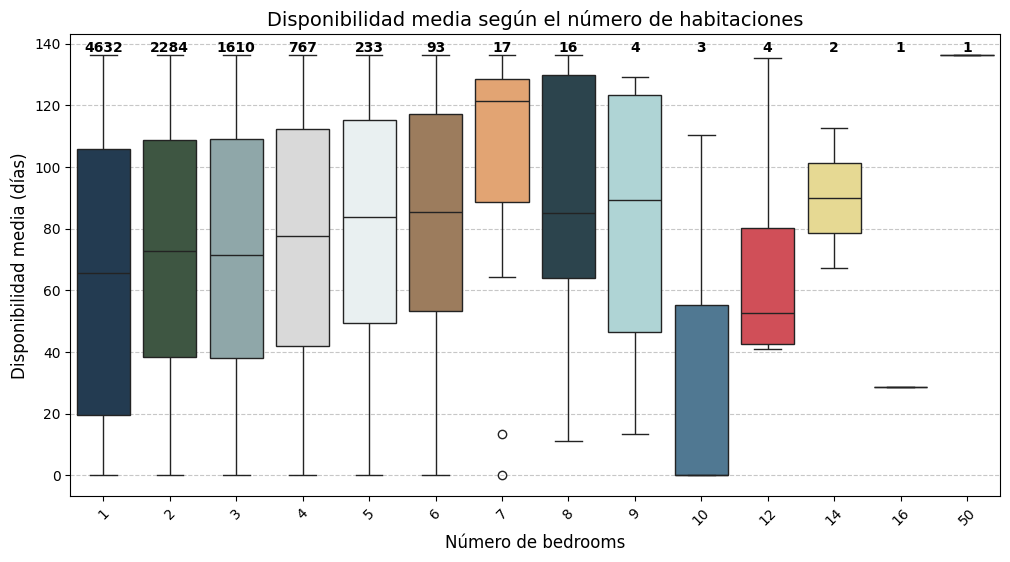

C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\876517190.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=feature, y="availability_mean", data=df_filtered, palette=paleta)
C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\876517190.py:16: UserWarning: The palette list has more values (15) than needed (13), which may not be intended.
  ax = sns.boxplot(x=feature, y="availability_mean", data=df_filtered, palette=paleta)


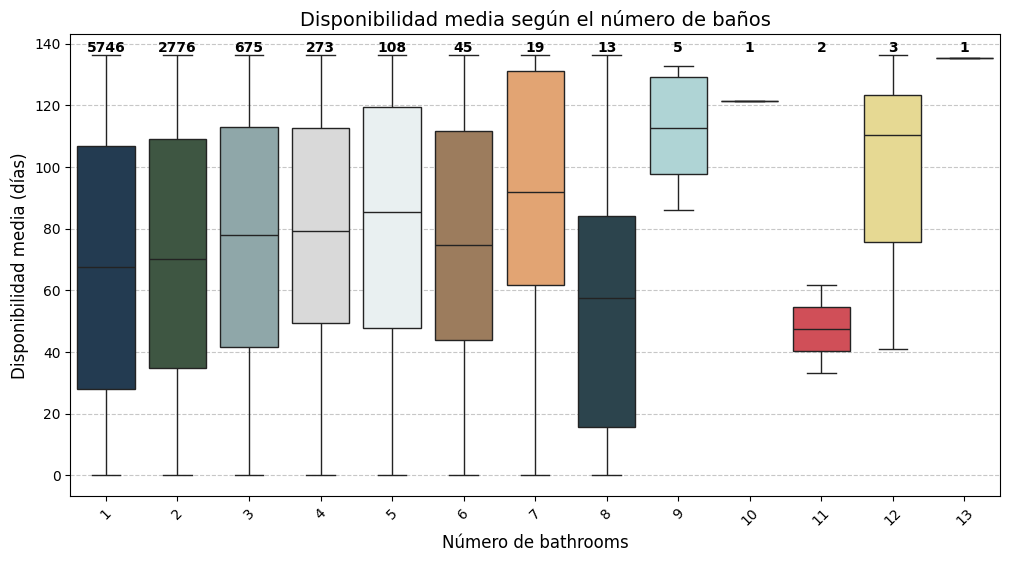

C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\876517190.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=feature, y="availability_mean", data=df_filtered, palette=paleta)
C:\Users\jodri\AppData\Local\Temp\ipykernel_8448\876517190.py:16: UserWarning: 
The palette list has fewer values (15) than needed (21) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x=feature, y="availability_mean", data=df_filtered, palette=paleta)


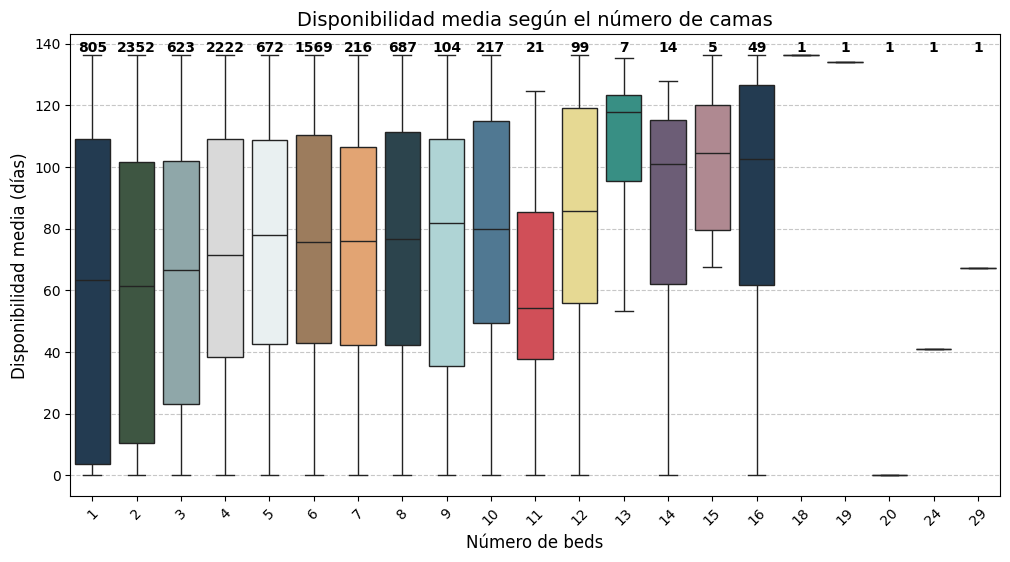

In [48]:
# Crear una columna con disponibilidad media
df["availability_mean"] = df[["availability_30", "availability_60", "availability_90", "availability_365"]].mean(axis=1)

# Filtrar valores extremos (opcional)
df_filtered = df[(df["bedrooms"] > 0) & (df["bathrooms"] > 0) & (df["beds"] > 0)]  

# Configurar paleta de colores
paleta = [
    "#1B3C59", "#3A5A40", "#8BAAAD", "#D9D9D9", "#E8F1F2", "#A67C52",
    "#F4A261", "#264653", "#A8DADC", "#457B9D", "#E63946", "#F4E285",
    "#2A9D8F", "#6D597A", "#B5838D"
]

def plot_boxplot(feature, title):
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(x=feature, y="availability_mean", data=df_filtered, palette=paleta)

    # Agregar etiquetas de conteo encima de cada boxplot
    counts = df_filtered[feature].value_counts().sort_index()
    for i, valor in enumerate(counts.index):
        count = counts[valor]
        plt.text(i, df_filtered["availability_mean"].max(), str(count), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

    plt.xlabel(f"Número de {feature}", fontsize=12)
    plt.ylabel("Disponibilidad media (días)", fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Generar gráficos para habitaciones, baños y camas
plot_boxplot("bedrooms", "Disponibilidad media según el número de habitaciones")
plot_boxplot("bathrooms", "Disponibilidad media según el número de baños")
plot_boxplot("beds", "Disponibilidad media según el número de camas")


In [47]:
summary_table = df_filtered.groupby(["city"]).agg({
    "bedrooms": "median",
    "bathrooms": "median",
    "beds": "median",
    "availability_mean": ["mean", "median"]
}).round(2)

print(summary_table)


          bedrooms bathrooms   beds availability_mean       
            median    median median              mean median
city                                                        
barcelona      1.0       1.0    2.0             66.91  67.50
girona         2.0       1.0    6.0             73.64  77.25
madrid         1.0       1.0    3.0             61.55  62.12
malaga         1.0       1.0    4.0             72.16  74.62
mallorca       3.0       2.0    6.0             76.34  76.62
menorca        3.0       2.0    6.0             72.38  70.50
sevilla        1.0       1.0    4.0             73.53  76.88
valencia       2.0       1.0    4.0             64.84  64.75


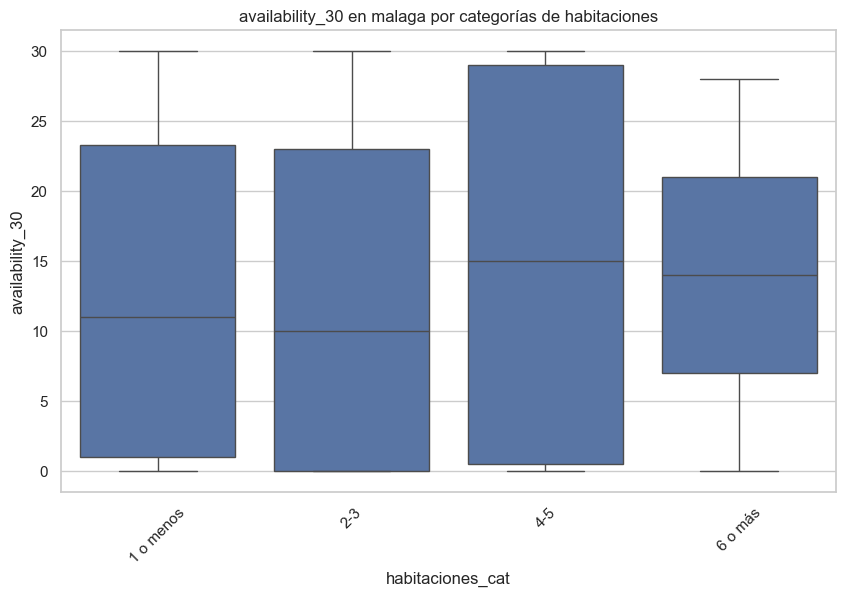

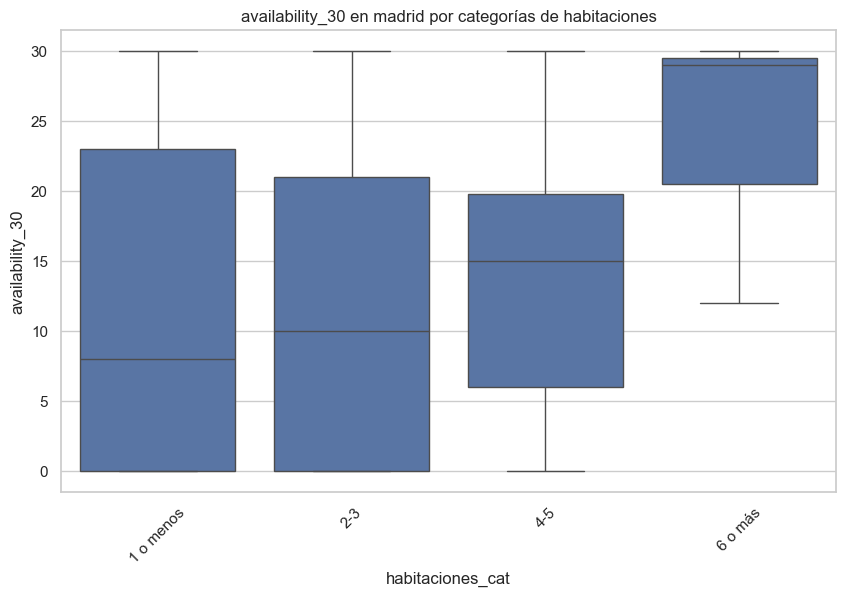

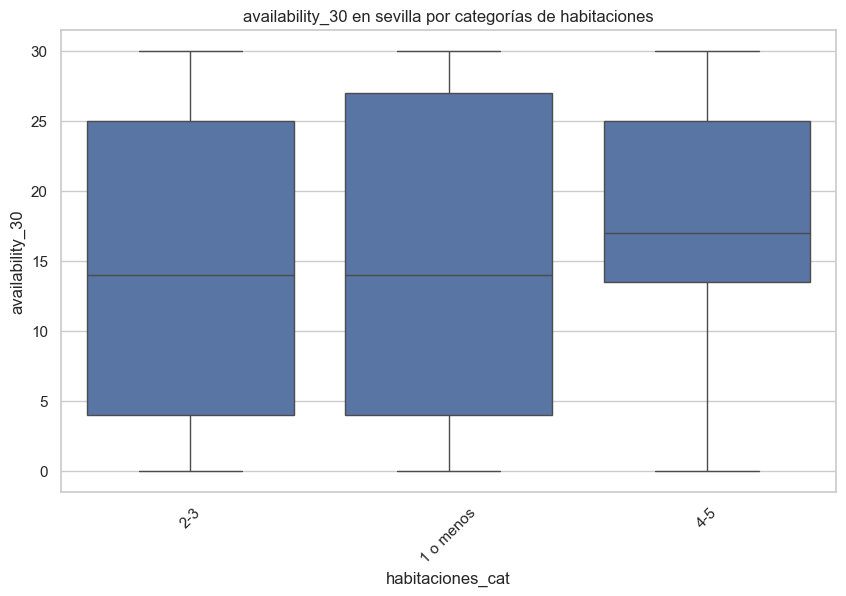

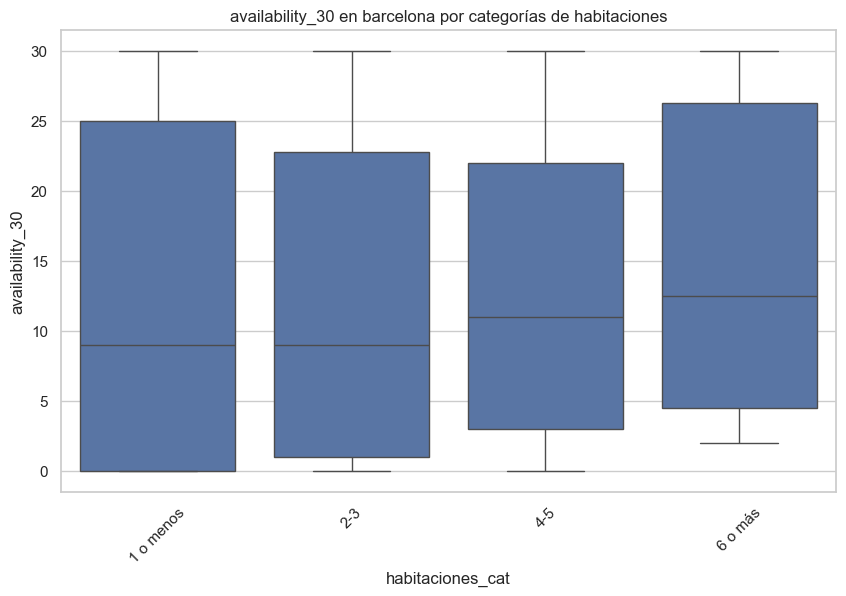

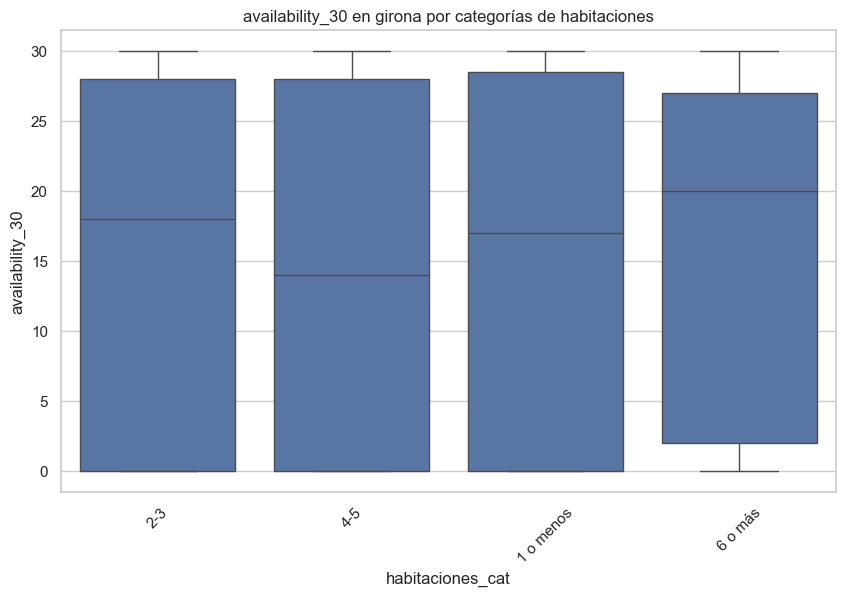

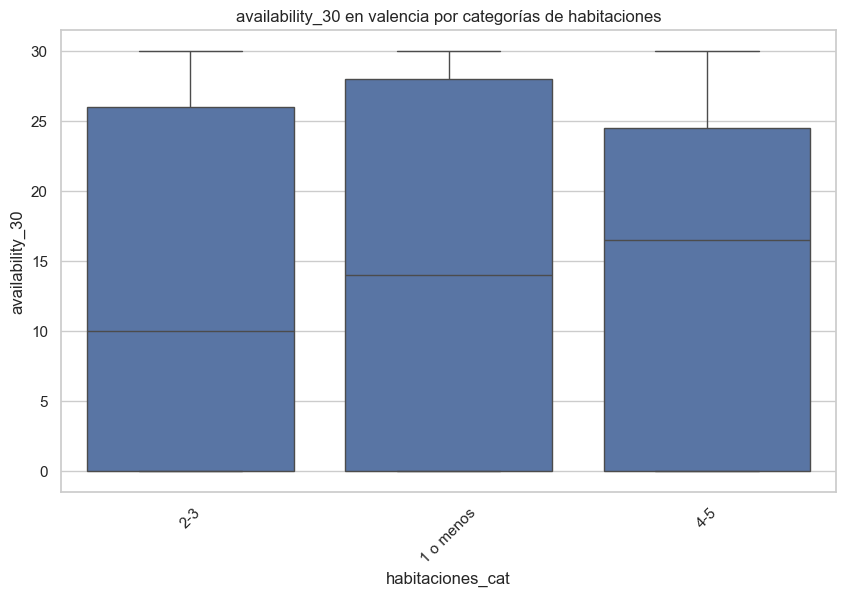

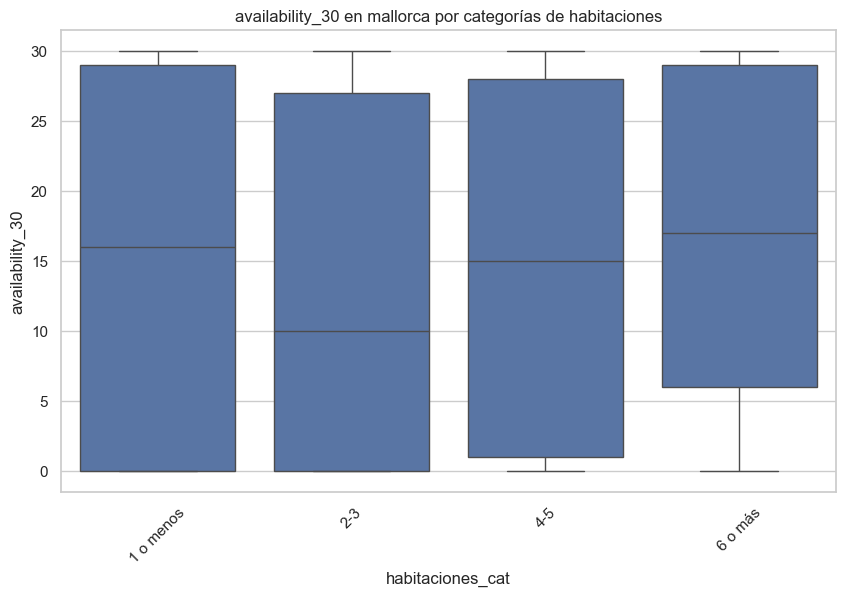

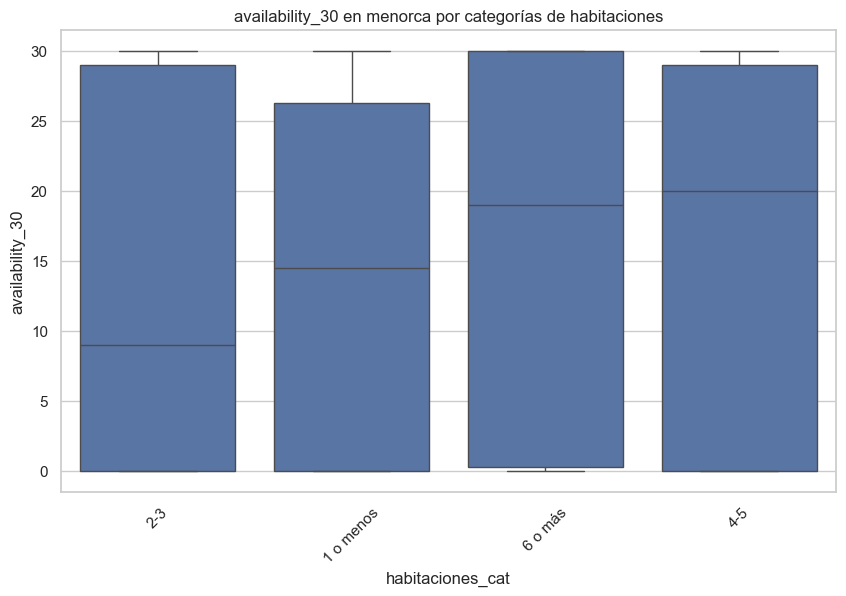

ValueError: could not convert string to float: 'A ROOM WITH A VIEW'

In [83]:
# Agrupar habitaciones, baños y camas en categorías
def categorizar(valor):
    if valor <= 1:
        return "1 o menos"
    elif valor <= 3:
        return "2-3"
    elif valor <= 5:
        return "4-5"
    else:
        return "6 o más"

df["habitaciones_cat"] = df["bedrooms"].apply(categorizar)
df["banos_cat"] = df["bathrooms"].apply(categorizar)
df["camas_cat"] = df["beds"].apply(categorizar)

# Crear gráficos separados por ciudad
ciudades = df["city"].unique()
for ciudad in ciudades:
    plt.figure(figsize=(10, 6))
    subset = df[df["city"] == ciudad]
    sns.boxplot(x="habitaciones_cat", y="availability_30", data=subset)
    plt.title(f"availability_30 en {ciudad} por categorías de habitaciones")
    plt.xticks(rotation=45)
    plt.show()

# Analizar correlación dentro de cada ciudad
for ciudad in ciudades:
    subset = df[df["city"] == ciudad]
    correlacion = subset.corr()["availability_30"]
    print(f"Correlaciones en {ciudad}:\n{correlacion}\n")


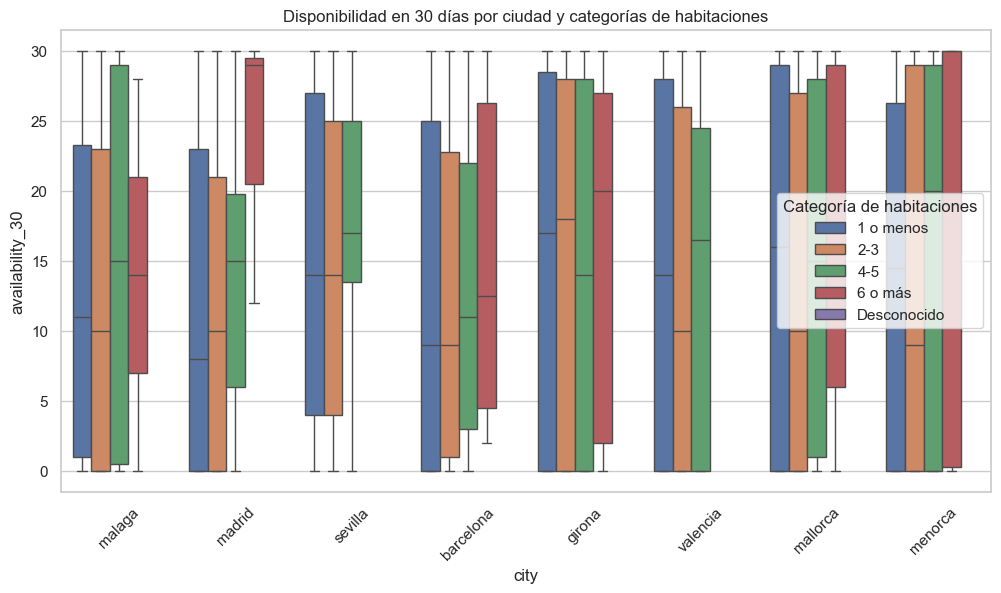

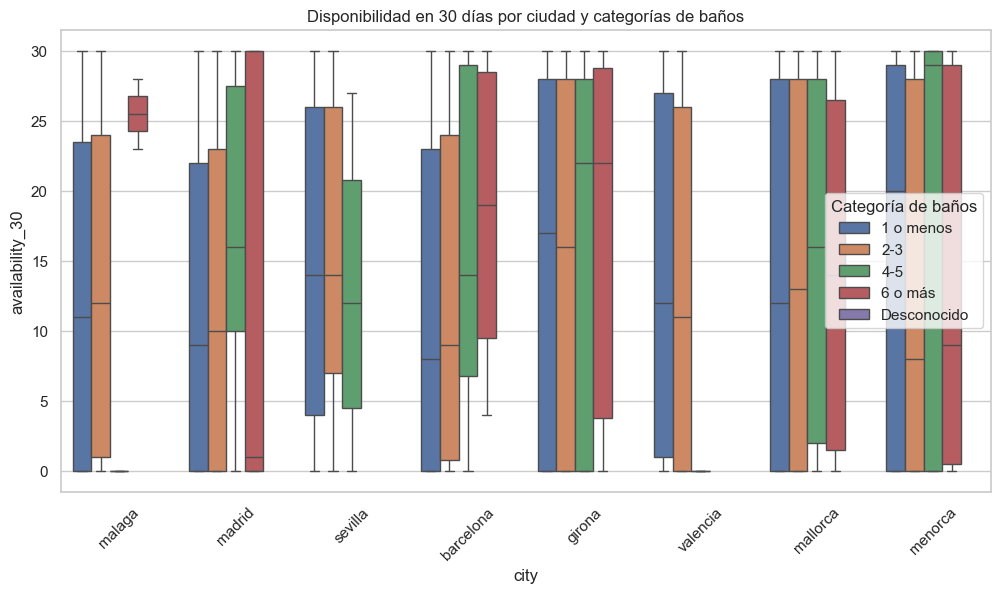

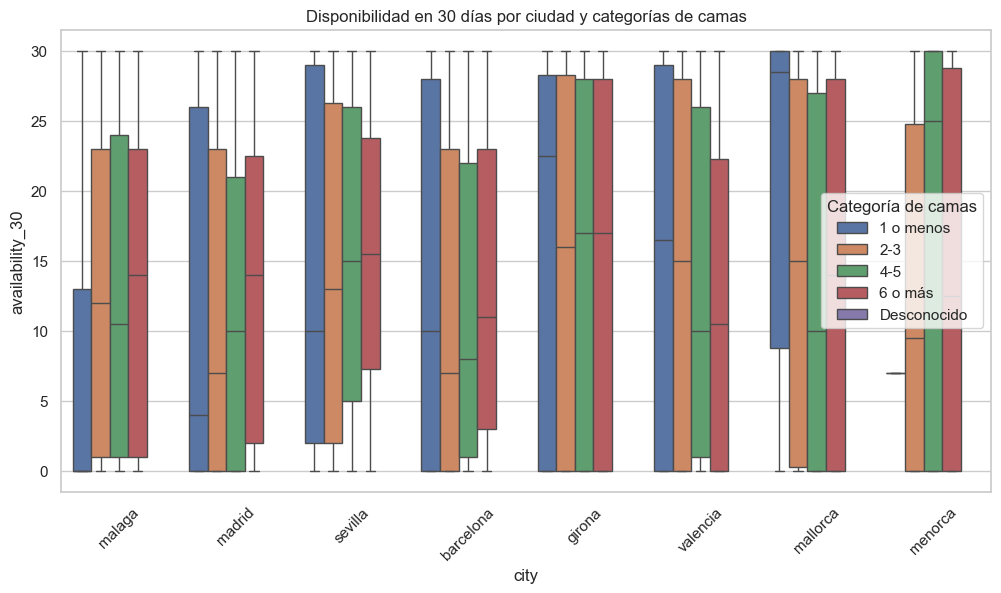

In [86]:
# Función para categorizar habitaciones, baños y camas
def categorizar(valor):
    if pd.isna(valor):
        return "Desconocido"
    elif valor <= 1:
        return "1 o menos"
    elif valor <= 3:
        return "2-3"
    elif valor <= 5:
        return "4-5"
    else:
        return "6 o más"

# Aplicar categorización
df["habitaciones_cat"] = df["bedrooms"].apply(categorizar)
df["banos_cat"] = df["bathrooms"].apply(categorizar)
df["camas_cat"] = df["beds"].apply(categorizar)

# Asegurar orden de categorías
orden_categorias = ["1 o menos", "2-3", "4-5", "6 o más", "Desconocido"]

# Gráfico combinado para habitaciones
plt.figure(figsize=(12, 6))
sns.boxplot(x="city", y="availability_30", hue="habitaciones_cat", data=df, hue_order=orden_categorias)
plt.title("Disponibilidad en 30 días por ciudad y categorías de habitaciones")
plt.xticks(rotation=45)
plt.legend(title="Categoría de habitaciones")
plt.show()

# Repetir para baños
plt.figure(figsize=(12, 6))
sns.boxplot(x="city", y="availability_30", hue="banos_cat", data=df, hue_order=orden_categorias)
plt.title("Disponibilidad en 30 días por ciudad y categorías de baños")
plt.xticks(rotation=45)
plt.legend(title="Categoría de baños")
plt.show()

# Repetir para camas
plt.figure(figsize=(12, 6))
sns.boxplot(x="city", y="availability_30", hue="camas_cat", data=df, hue_order=orden_categorias)
plt.title("Disponibilidad en 30 días por ciudad y categorías de camas")
plt.xticks(rotation=45)
plt.legend(title="Categoría de camas")
plt.show()



# ------- HASTA AQUÍ LO MÍO DE ESTA SEMANA -----------

# KPIS

In [61]:
# Asegurar que la fecha está en formato datetime
df['insert_date'] = pd.to_datetime(df['insert_date'])

# Extraer el mes y año
df['year_month'] = df['insert_date'].dt.to_period('M')

# Calcular disponibilidad promedio mensual
df_monthly = df.groupby('year_month')['availability_30'].mean().reset_index()

# Calcular la tasa de ocupación mensual
df_monthly['tasa_ocupacion'] = (1 - df_monthly['availability_30'] / 30) * 100

# Obtener la tasa de ocupación del mes actual y de la semana pasada
tasa_actual = df_monthly['tasa_ocupacion'].iloc[-1]
tasa_semana_pasada = 56.53  # Dato proporcionado

# Determinar el color de la flecha
color_flecha = 'green' if tasa_actual > tasa_semana_pasada else 'red'
simbolo_flecha = '▲' if tasa_actual > tasa_semana_pasada else '▼'

# Calcular tasa de ocupación por ciudad
df_city = df.groupby('city')['availability_30'].mean().reset_index()
df_city['tasa_ocupacion'] = (1 - df_city['availability_30'] / 30) * 100

# Obtener la ciudad con mayor ocupación
ciudad_max_ocupacion = df_city.loc[df_city['tasa_ocupacion'].idxmax()]

# Mostrar los resultados
print(f"📊 **Tasa de ocupación mensual:** {tasa_actual:.2f}% {simbolo_flecha} (vs. {tasa_semana_pasada}%)")
print(f"🏙️ **Ciudad con mayor ocupación:** {ciudad_max_ocupacion['city']} ({ciudad_max_ocupacion['tasa_ocupacion']:.2f}%)")


📊 **Tasa de ocupación mensual:** 53.57% ▼ (vs. 56.53%)
🏙️ **Ciudad con mayor ocupación:** madrid (61.01%)


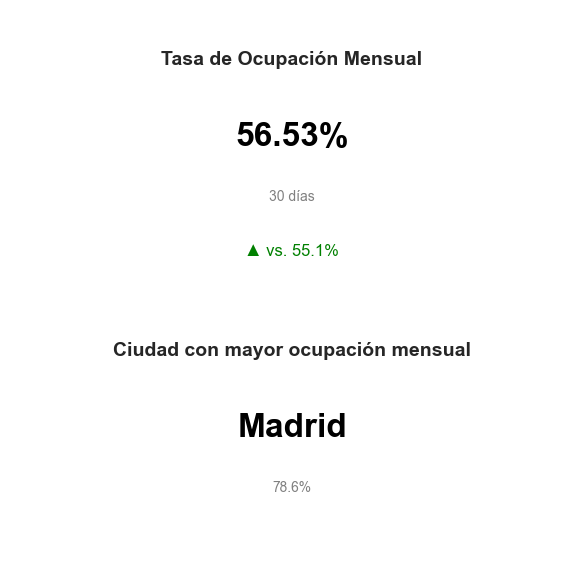

In [62]:
# Datos ficticios de ejemplo
tasa_ocupacion_actual = 56.53
tasa_ocupacion_anterior = 55.10  # Valor de la semana pasada

ciudad_mayor_ocupacion = "Madrid"
ocupacion_ciudad_max = 78.6  # Tasa de ocupación en la ciudad con mayor ocupación

# Determinar el color y la flecha según la variación de la tasa de ocupación
color_flecha = 'green' if tasa_ocupacion_actual > tasa_ocupacion_anterior else 'red'
simbolo_flecha = '▲' if tasa_ocupacion_actual > tasa_ocupacion_anterior else '▼'

# Crear la figura
fig, ax = plt.subplots(2, 1, figsize=(6, 6))

# Métrica 1: Tasa de Ocupación Mensual
ax[0].text(0.5, 0.8, "Tasa de Ocupación Mensual", ha='center', fontsize=14, fontweight='bold')
ax[0].text(0.5, 0.5, f"{tasa_ocupacion_actual}%", ha='center', fontsize=24, fontweight='bold', color='black')
ax[0].text(0.5, 0.3, "30 días", ha='center', fontsize=10, color='gray')
ax[0].text(0.5, 0.1, f"{simbolo_flecha} vs. {tasa_ocupacion_anterior}%", ha='center', fontsize=12, color=color_flecha)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_frame_on(False)
ax[0].patch.set_facecolor('#A8DADC')

# Métrica 2: Ciudad con mayor ocupación
ax[1].text(0.5, 0.8, "Ciudad con mayor ocupación mensual", ha='center', fontsize=14, fontweight='bold')
ax[1].text(0.5, 0.5, ciudad_mayor_ocupacion, ha='center', fontsize=24, fontweight='bold', color='black')
ax[1].text(0.5, 0.3, f"{ocupacion_ciudad_max}%", ha='center', fontsize=10, color='gray')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_frame_on(False)
ax[1].patch.set_facecolor('#A8DADC')

# Ajustar el diseño
plt.tight_layout()
plt.show()


In [ ]:
# Suponiendo que tienes un DataFrame con la columna 'availability_30'

# Calcular los días ocupados como (30 - availability_30)
df['dias_ocupados'] = 30 - df['availability_30']

# Calcular la tasa de ocupación como (días ocupados / 30) * 100
tasa_ocupacion_mensual = (df['dias_ocupados'].sum() / (len(df) * 30)) * 100

print(f"Tasa de ocupación mensual: {tasa_ocupacion_mensual:.2f}%")


Tasa de ocupación mensual: 56.62%
